In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv("Robberies.csv",parse_dates=True,index_col='Months')

In [3]:
print(df)

            Robberies
Months               
1966-01-01         41
1966-02-01         39
1966-03-01         50
1966-04-01         40
1966-05-01         43
...               ...
1975-06-01        316
1975-07-01        398
1975-08-01        394
1975-09-01        431
1975-10-01        431

[118 rows x 1 columns]


In [4]:
df.index.freq='MS'

<Axes: xlabel='Months'>

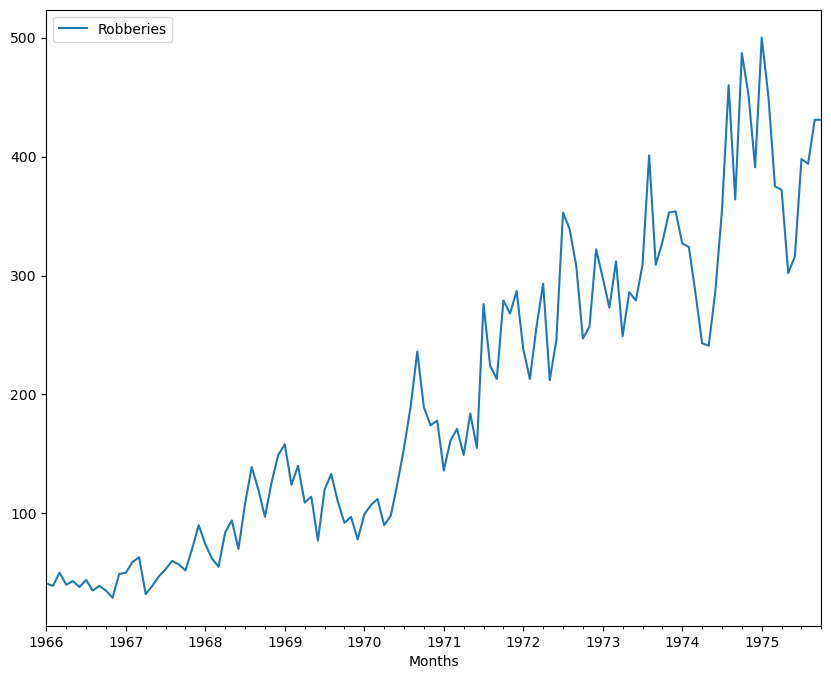

In [5]:
df.plot(figsize=(10,8))

I have selected the Monthly Robbery Rate from Fred, which has a frequency of month start. Through seasonal decompose using the statsmodels library and can visualize that the data has shown upwards trend and a seasonality of 12 months. 

# EDA

<Axes: xlabel='Robberies', ylabel='Count'>

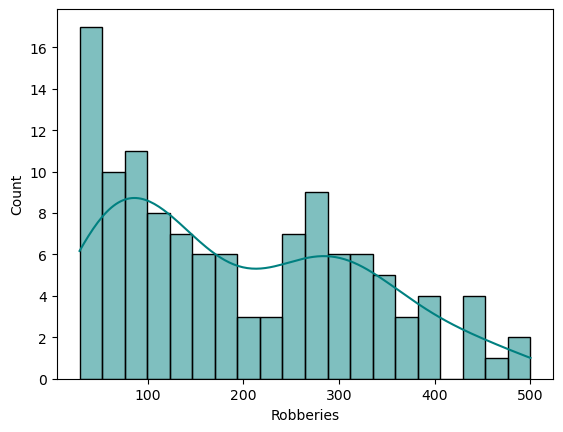

In [6]:
import seaborn as sns
sns.histplot(df['Robberies'], kde=True, bins=20, color='teal') 

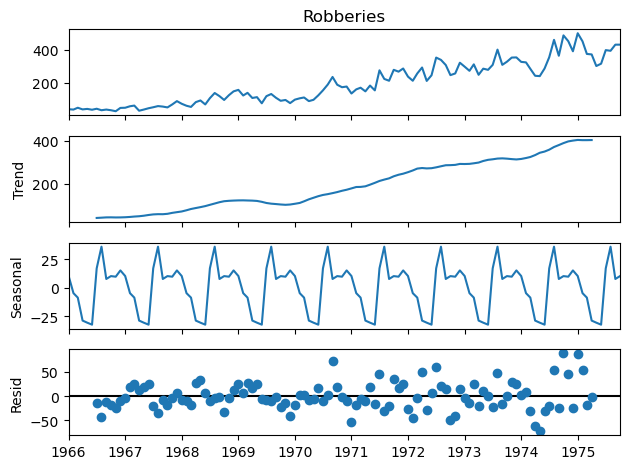

In [7]:
#seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df['Robberies'])
result.plot();

A seasonality of 12 months can be seen here 

<Axes: xlabel='Months'>

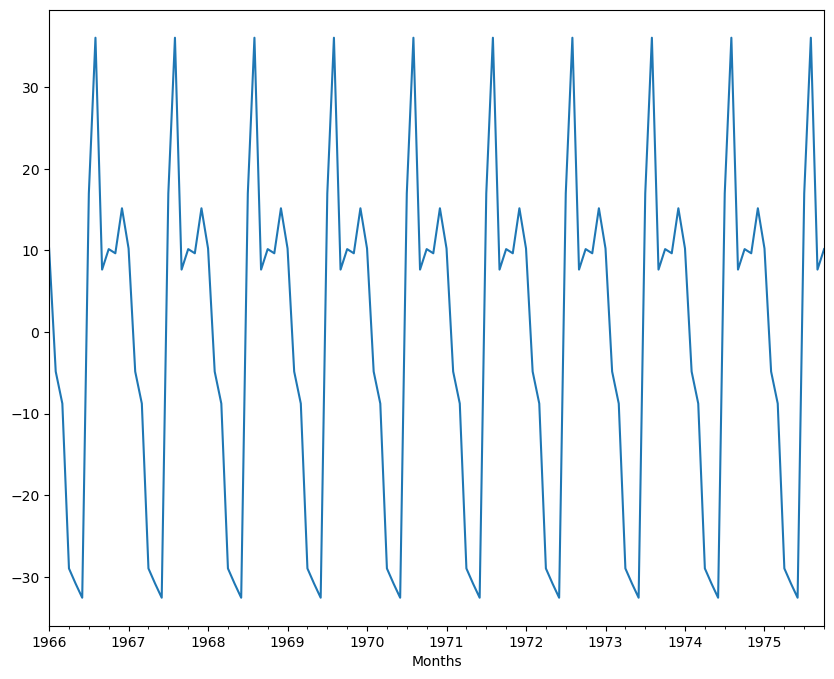

In [8]:
result.seasonal.plot(figsize=(10,8))

In [9]:
len(df)

118

In [10]:
train=df.iloc[:106]
print(len(train))

106


In [11]:
test=df.iloc[106:]
print(len(test))

12


In [12]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [13]:
print(scaled_train)

[[0.02620087]
 [0.02183406]
 [0.04585153]
 [0.02401747]
 [0.03056769]
 [0.01965066]
 [0.03275109]
 [0.01310044]
 [0.02183406]
 [0.01310044]
 [0.        ]
 [0.04366812]
 [0.04585153]
 [0.06550218]
 [0.07423581]
 [0.00655022]
 [0.02183406]
 [0.03930131]
 [0.05240175]
 [0.06768559]
 [0.06113537]
 [0.05021834]
 [0.08951965]
 [0.13318777]
 [0.09825328]
 [0.0720524 ]
 [0.05676856]
 [0.12008734]
 [0.1419214 ]
 [0.08951965]
 [0.17248908]
 [0.24017467]
 [0.19868996]
 [0.14847162]
 [0.21179039]
 [0.26200873]
 [0.28165939]
 [0.20742358]
 [0.24235808]
 [0.17467249]
 [0.18558952]
 [0.10480349]
 [0.19868996]
 [0.22707424]
 [0.1768559 ]
 [0.13755459]
 [0.14847162]
 [0.1069869 ]
 [0.15283843]
 [0.17030568]
 [0.18122271]
 [0.13318777]
 [0.15065502]
 [0.20960699]
 [0.27510917]
 [0.35152838]
 [0.45196507]
 [0.34934498]
 [0.31659389]
 [0.32532751]
 [0.23362445]
 [0.28820961]
 [0.31004367]
 [0.26200873]
 [0.33842795]
 [0.27510917]
 [0.53930131]
 [0.42576419]
 [0.40174672]
 [0.54585153]
 [0.52183406]
 [0.56

In [14]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [15]:
# choose a number of time steps
n_steps = 12
# split into samples
X, y = prepare_data(scaled_train.reshape(len(scaled_train),), n_steps)

In [16]:
print(X)
print(y)

[[0.02620087 0.02183406 0.04585153 ... 0.01310044 0.         0.04366812]
 [0.02183406 0.04585153 0.02401747 ... 0.         0.04366812 0.04585153]
 [0.04585153 0.02401747 0.03056769 ... 0.04366812 0.04585153 0.06550218]
 ...
 [0.81222707 0.61135371 0.65283843 ... 0.4628821  0.56331878 0.71179039]
 [0.61135371 0.65283843 0.70742358 ... 0.56331878 0.71179039 0.94104803]
 [0.65283843 0.70742358 0.70960699 ... 0.71179039 0.94104803 0.73144105]]
[0.04585153 0.06550218 0.07423581 0.00655022 0.02183406 0.03930131
 0.05240175 0.06768559 0.06113537 0.05021834 0.08951965 0.13318777
 0.09825328 0.0720524  0.05676856 0.12008734 0.1419214  0.08951965
 0.17248908 0.24017467 0.19868996 0.14847162 0.21179039 0.26200873
 0.28165939 0.20742358 0.24235808 0.17467249 0.18558952 0.10480349
 0.19868996 0.22707424 0.1768559  0.13755459 0.14847162 0.1069869
 0.15283843 0.17030568 0.18122271 0.13318777 0.15065502 0.20960699
 0.27510917 0.35152838 0.45196507 0.34934498 0.31659389 0.32532751
 0.23362445 0.2882096

In [74]:
n_features=1
n_steps=12
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(30, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

C:\Users\princ\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 12, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1532
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1389 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1035 
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0825
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0541 
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0344 
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0162 
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0238 
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0118
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0128 
Epoch 13/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 
Epoch 14/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 
Epoch 15/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 
Epoch 16/200
3/3 ━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 
Epoch 84/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 
Epoch 85/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 
Epoch 86/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083 
Epoch 87/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0093 
Epoch 88/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0079 
Epoch 89/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0087 
Epoch 90/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 
Epoch 91/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0076 
Epoch 92/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 
Epoch 93/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087 
Epoch 94/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 
Epoch 95/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080 
Epoch 96/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 
Epoch 97/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077 
Epoch 98/200
3/3 ━━━━━━

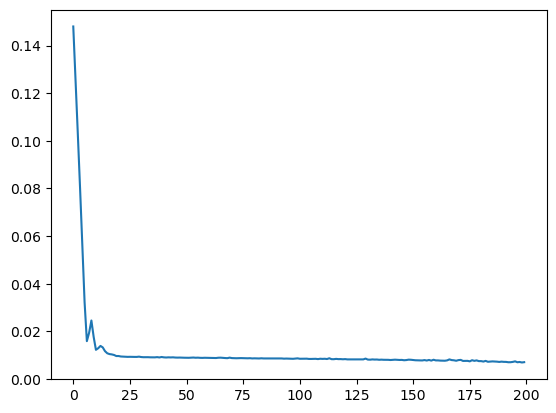

In [76]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

I have splitted the entire data in 106 training data and 12 test data.
and applied feature scaling on the training data in order to our model to interpret these features on the same scale.
and preprocessed our training data to generate a sequence where past 12 months data would help to predict the next data as we have got a seasonality.
and fit our training data into our sequential model and trained the model for 200 epochs, with adam as optimizer and mse as loss criterion.
The training loss per epoch is as below

In [77]:
n_input=12
n_features=1
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [78]:
test_predictions

[array([0.7881096], dtype=float32),
 array([0.77176285], dtype=float32),
 array([0.75894445], dtype=float32),
 array([0.76592064], dtype=float32),
 array([0.7754656], dtype=float32),
 array([0.79794], dtype=float32),
 array([0.83872753], dtype=float32),
 array([0.8872315], dtype=float32),
 array([0.93083936], dtype=float32),
 array([0.95983905], dtype=float32),
 array([0.9569007], dtype=float32),
 array([0.97327906], dtype=float32)]

In [79]:
true_predictions = scaler.inverse_transform(test_predictions)

In [80]:
true_predictions

array([[389.95419705],
       [382.46738434],
       [376.59655893],
       [379.79165268],
       [384.1632483 ],
       [394.45652723],
       [413.13721049],
       [435.35204017],
       [455.32442677],
       [468.60628307],
       [467.26052785],
       [474.76180899]])

The inverse_transform function only works if the scaler object has been previously fitted to the data using the fit method.
The StandardScaler assumes that the data follows a Gaussian distribution. If this is not the case, consider using other scaling methods like MinMaxScaler or RobustScaler from scikit-learn.

In [81]:
test['Predictions'] = true_predictions

C:\Users\princ\AppData\Local\Temp\ipykernel_23664\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [82]:
test.head(5)

,Robberies,Predictions
Months,,
1974-11-01,452,389.954197
1974-12-01,391,382.467384
1975-01-01,500,376.596559
1975-02-01,451,379.791653
1975-03-01,375,384.163248


<Axes: xlabel='Months'>

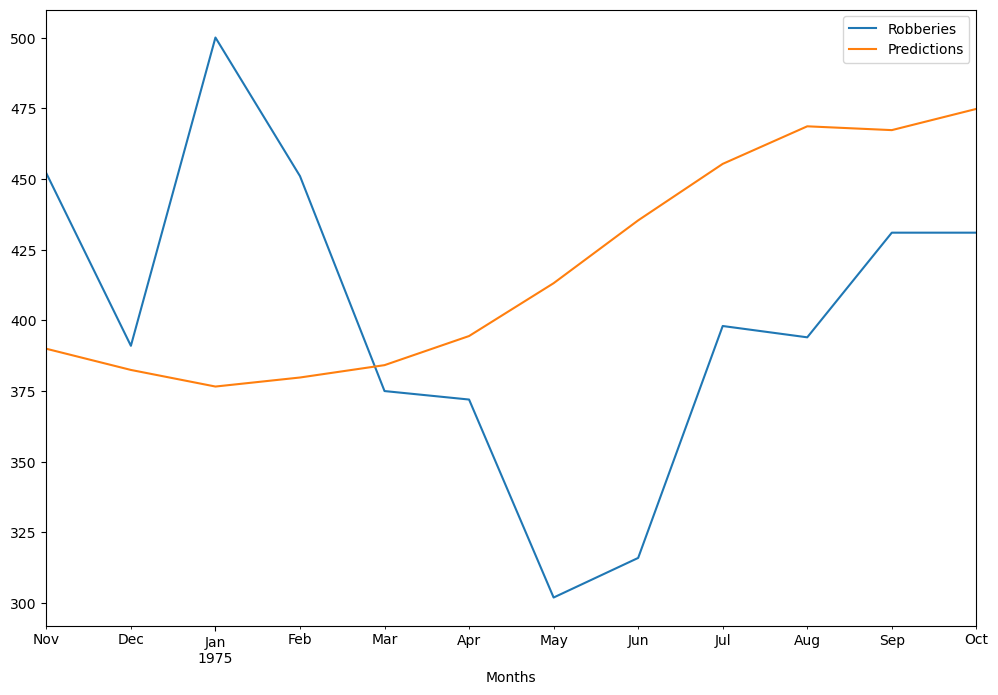

In [83]:
test.plot(figsize=(12,8))

In [84]:
print(rmse(test['Robberies'],test['Predictions']))

72.73713182713873


Here it’s a continuous output and  used RMSE(root mean squared error) as our evaluation metrics, used the rmse function from statsmodels library to calculate the rmse score on our test data.
and achieved a rmse of 72.73 with our model.

## Conclusion and Comparison: LSTM vs. RNN for Time Series Forecasting

My model using an LSTM network achieved a good RMSE score of 72.73 for predicting monthly robbery rates. This indicates that LSTMs are a more suitable choice than standard RNNs for this specific time series forecasting task due to the following reasons:

**Addressing Long-Term Dependencies:**

- Standard RNNs suffer from the vanishing gradient problem, where information from distant past time steps becomes progressively less relevant during training. This makes it difficult for them to capture long-term dependencies within the data.
- LSTMs overcome this issue through their internal cell state and gating mechanisms. These allow them to selectively remember and utilize relevant information from past time steps, even over longer periods, leading to more accurate predictions for data with seasonal trends like your robbery rate data.

**Modeling Seasonality:**

- The presence of a clear 12-month seasonality in the robbery rate data highlights the importance of a model that can effectively capture and leverage this recurring pattern.
- LSTMs excel at learning and exploiting such seasonality due to their ability to retain past information for extended periods. This allows them to adapt their predictions based on the recurring seasonal trend, leading to superior performance compared to standard RNNs that might struggle to capture such long-term patterns.

**Addressing Gradient Exploding/Vanishing:**

- Standard RNNs can also suffer from exploding gradients, where the gradient values become excessively large during backpropagation, leading to unstable training and inaccurate results.
- LSTMs mitigate this issue through their gating mechanisms, which regulate the flow of information within the network, preventing gradients from exploding or vanishing excessively. This ensures smoother training and convergence to better solutions.

**Overall Advantages of LSTMs:**

- While both LSTMs and RNNs are designed for sequence data, LSTMs offer significant advantages in capturing long-term dependencies, handling seasonality, and avoiding gradient problems. These characteristics make them particularly well-suited for time series forecasting tasks like the one presented.

**Additional Considerations:**

- The achieved RMSE of 72.73 suggests that further optimization might be possible. Hyperparameter tuning, exploring different network architectures, or incorporating additional features could potentially lead to even better results.
- While LSTMs generally outperform standard RNNs in time series forecasting, the choice between them depends on the specific characteristics of your data and the complexity of the relationships you want to model.

In summary, your model demonstrates the effectiveness of LSTMs for forecasting the monthly robbery rate data with a clear seasonal pattern. Their ability to handle long-term dependencies and mitigate gradient issues makes them a superior choice compared to standard RNNs in this scenario, leading to the achieved RMSE score of 72.73.
